In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset 

In [2]:
data = pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


#  Displaying the shape of dataset

In [3]:
data.shape

(112, 2)

# Describing the dataset

In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Displaying information about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


# Finding null values

In [6]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
#No null values, therefore can proceed to Linear regression

# Plotting the dataset as Bar graph

<BarContainer object of 112 artists>

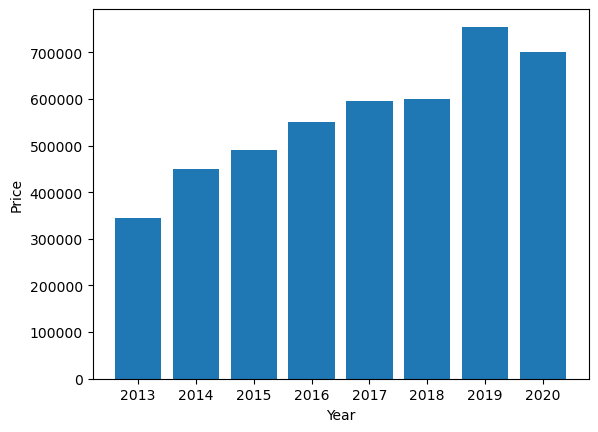

In [8]:
plt.xlabel('Year')
plt.ylabel('Price')
plt.bar(data.Year,data.Price)

# Prediction of 2022 price

In [9]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
reg.predict([[2022]])

C:\Users\Aswin Raj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

# Comparison between Linear regression and Lasso regression

In [14]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  4326906256.829671
R2 is :  0.36759313425902185


In [17]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
lasso.fit(x_train,y_train)

Lasso()

In [18]:
l_pred=lasso.predict(x_test)
l_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,l_pred))
print('R2 is : ',r2_score(y_test,l_pred))

MSE is :  4326859771.015669
R2 is :  0.3675999284778446


In [20]:
#The MSE value of Lasso is lower than Linear and the R2 value of Lasso is closer to 1 in comparison to Linear. This indicates that Lasso is the better regression among the two.